In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('36_titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.shape

(891, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [8]:
x = df.drop(columns='Survived')
y = df['Survived']

In [9]:
x

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,0
888,NaN,23.4500,3
889,26.0,NaN,0


In [10]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [13]:
x_train.shape

(712, 3)

In [14]:
x_train.head()

,Age,Fare,Family
863,NaN,69.5500,10
261,3.0,31.3875,6
470,NaN,7.2500,0
158,NaN,8.6625,0
712,48.0,52.0000,1


In [15]:
x_train.isnull().mean()

Age       0.199438
Fare      0.044944
Family    0.000000
dtype: float64

In [16]:
x_test.shape

(179, 3)

In [17]:
x_train.describe()

,Age,Fare,Family
count,570.000000,680.000000,712.000000
mean,30.109070,32.436666,0.939607
std,14.593104,49.915959,1.685715
min,0.420000,0.000000,0.000000
25%,21.000000,7.917700,0.000000
50%,28.750000,14.500000,0.000000
75%,39.000000,31.000000,1.000000
max,80.000000,512.329200,10.000000


In [18]:
Mean = df['Age'].mean()

In [19]:
std = df['Age'].std()

In [24]:
var1 = Mean - 3*std

In [25]:
var2 = Mean + 3*std

In [29]:
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)

In [31]:
iqr = q3 - q1

In [33]:
kar1 = q1 - iqr*1.5

In [34]:
kar2 = q3 + 1.5*iqr

In [35]:
x_train['age_minus'] = x_train['Age'].fillna(var1)
x_train['age_plus'] = x_train['Age'].fillna(var2)
x_train['fare_minus'] =x_train['Fare'].fillna(kar1)
x_train['fare_plus'] = x_train['Fare'].fillna(kar2)

In [36]:
x_train.head()

,Age,Fare,Family,age_minus,age_plus,fare_minus,fare_plus
863,NaN,69.5500,10,-13.880374,73.27861,69.5500,69.5500
261,3.0,31.3875,6,3.000000,3.00000,31.3875,31.3875
470,NaN,7.2500,0,-13.880374,73.27861,7.2500,7.2500
158,NaN,8.6625,0,-13.880374,73.27861,8.6625,8.6625
712,48.0,52.0000,1,48.000000,48.00000,52.0000,52.0000


In [38]:
print('Original Age variable variance: ', x_train['Age'].var())
print('Age Variance after median imputation: ', x_train['age_minus'].var())
print('Age Variance after mean imputation: ',x_train['age_plus'].var())

print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after median imputation: ', x_train['fare_minus'].var())
print('Fare Variance after mean imputation: ', x_train['fare_plus'].var())

Original Age variable variance:  212.95868823759736
Age Variance after median imputation:  479.81991019202013
Age Variance after mean imputation:  468.3940388450623
Original Fare variable variance:  2491.60301268233
Fare Variance after median imputation:  2531.671787224613
Fare Variance after mean imputation:  2428.38233490524


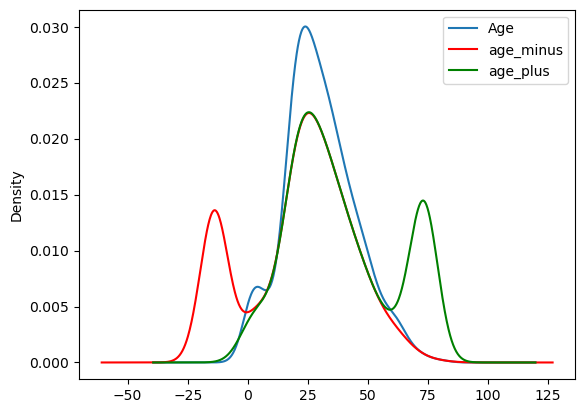

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['age_minus'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['age_plus'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

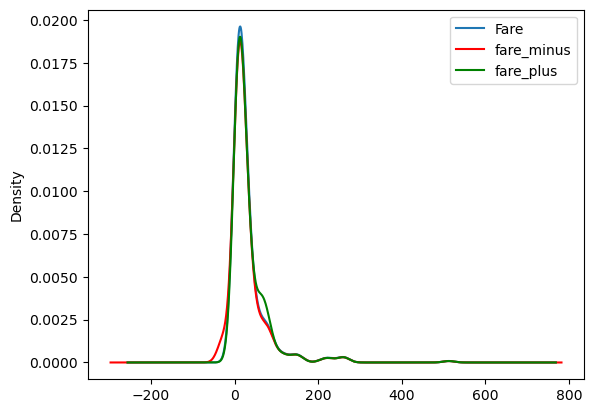

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['fare_minus'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['fare_plus'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [41]:
x_train.cov()

,Age,Fare,Family,age_minus,age_plus,fare_minus,fare_plus
Age,212.958688,73.933763,-6.298264,212.958688,212.958688,72.105756,69.574807
Fare,73.933763,2491.603013,18.901836,143.352537,-23.639951,2491.603013,2491.603013
Family,-6.298264,18.901836,2.841636,-4.395442,-5.673303,18.140457,18.000475
age_minus,212.958688,143.352537,-4.395442,479.819910,-133.199524,133.105177,139.052391
age_plus,212.958688,-23.639951,-5.673303,-133.199524,468.394039,-16.290040,-26.139596
fare_minus,72.105756,2491.603013,18.140457,133.105177,-16.290040,2531.671787,2293.173836
fare_plus,69.574807,2491.603013,18.000475,139.052391,-26.139596,2293.173836,2428.382335


In [42]:
x_train.corr()

,Age,Fare,Family,age_minus,age_plus,fare_minus,fare_plus
Age,1.000000,0.095319,-0.285645,1.000000,1.000000,0.092544,0.091384
Fare,0.095319,1.000000,0.221771,0.130671,-0.021829,1.000000,1.000000
Family,-0.285645,0.221771,1.000000,-0.119036,-0.155506,0.213875,0.216691
age_minus,1.000000,0.130671,-0.119036,1.000000,-0.280969,0.120768,0.128819
age_plus,1.000000,-0.021829,-0.155506,-0.280969,1.000000,-0.014959,-0.024510
fare_minus,0.092544,1.000000,0.213875,0.120768,-0.014959,1.000000,0.924857
fare_plus,0.091384,1.000000,0.216691,0.128819,-0.024510,0.924857,1.000000


<Axes: >

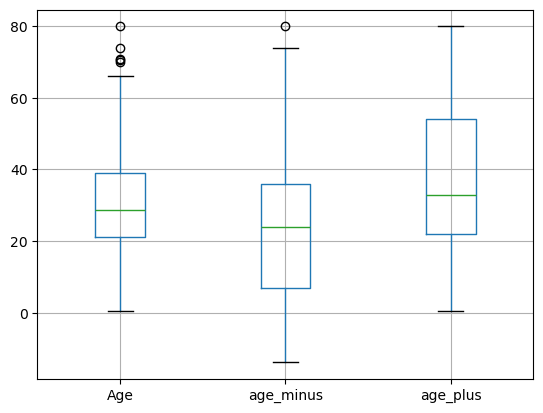

In [44]:
x_train[['Age', 'age_minus', 'age_plus']].boxplot()

<Axes: >

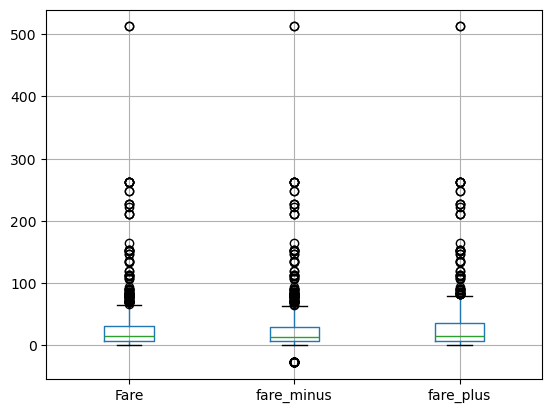

In [45]:
x_train[['Fare', 'fare_minus', 'fare_plus']].boxplot()

In [49]:
#Using sklearn

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [67]:
imputer1 = SimpleImputer(strategy = 'mean')
imputer2 = SimpleImputer(strategy = 'median')

In [68]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Fare']),
    ('imputer2',imputer2,['Age'])
    
],remainder = 'passthrough')

In [69]:
trf.fit(x_train)

C:\Users\Rajvardhan\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Fare']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Age'])])

In [70]:
trf.named_transformers_['imputer1'].statistics_

array([32.00544062])

In [71]:
trf.named_transformers_['imputer2'].statistics_

array([28.])

In [72]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)